In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import optuna

In [2]:
file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/k_ORP/train.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_train = data.iloc[:, -1]
X_train = data.iloc[:, 1:-1]

file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/k_ORP/test.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_test = data.iloc[:, -1]
X_test = data.iloc[:, 1:-1]

In [3]:
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.6),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    model = XGBRegressor(**param)
    
    # 使用k折交叉验证
    kf = KFold(n_splits=10, shuffle=True, random_state=99)
    rmse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        rmse_scores.append(rmse_fold)
    
    # 计算交叉验证的平均RMSE
    avg_rmse = np.mean(rmse_scores)
    
    return avg_rmse

In [4]:
# 创建Optuna试验
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-03-09 21:16:21,226] A new study created in memory with name: no-name-f57fc8fd-fb4a-4f54-a757-56463edc8694
[I 2024-03-09 21:16:22,811] Trial 0 finished with value: 0.677789621393937 and parameters: {'learning_rate': 0.31447650880854, 'n_estimators': 288, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.014998036596580964, 'subsample': 0.9554073845859827, 'colsample_bytree': 0.8521605383710369}. Best is trial 0 with value: 0.677789621393937.
[I 2024-03-09 21:16:23,856] Trial 1 finished with value: 0.6852451647858103 and parameters: {'learning_rate': 0.22614839777501203, 'n_estimators': 437, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.03161533701463748, 'subsample': 0.7188662934119198, 'colsample_bytree': 0.6564853774337777}. Best is trial 0 with value: 0.677789621393937.
[I 2024-03-09 21:16:24,546] Trial 2 finished with value: 0.7212588317918539 and parameters: {'learning_rate': 0.4903743057844848, 'n_estimators': 310, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.0422

[I 2024-03-09 21:16:40,190] Trial 24 finished with value: 0.6079303824376306 and parameters: {'learning_rate': 0.16709013200592374, 'n_estimators': 268, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.14699100028572987, 'subsample': 0.9993998681058237, 'colsample_bytree': 0.948501674875283}. Best is trial 19 with value: 0.5951254586072628.
[I 2024-03-09 21:16:40,895] Trial 25 finished with value: 0.6343794937752832 and parameters: {'learning_rate': 0.3919876994087674, 'n_estimators': 333, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.3128316756693108, 'subsample': 0.9263956281442419, 'colsample_bytree': 0.8819177660796012}. Best is trial 19 with value: 0.5951254586072628.
[I 2024-03-09 21:16:41,595] Trial 26 finished with value: 0.6193708697120692 and parameters: {'learning_rate': 0.10078360557996954, 'n_estimators': 297, 'max_depth': 2, 'min_child_weight': 6, 'gamma': 0.0829382663707463, 'subsample': 0.9688266357137983, 'colsample_bytree': 0.8524851441534059}. Best is trial 19 w

[I 2024-03-09 21:16:55,894] Trial 48 finished with value: 0.6294270097858619 and parameters: {'learning_rate': 0.33602947021059393, 'n_estimators': 247, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 0.3538582037898407, 'subsample': 0.8808016191807974, 'colsample_bytree': 0.6946587597130206}. Best is trial 31 with value: 0.5813888678602195.
[I 2024-03-09 21:16:56,484] Trial 49 finished with value: 0.6205729226188236 and parameters: {'learning_rate': 0.26079226284308576, 'n_estimators': 263, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.1841016634843822, 'subsample': 0.9178880428097157, 'colsample_bytree': 0.7846032669824909}. Best is trial 31 with value: 0.5813888678602195.
[I 2024-03-09 21:16:57,284] Trial 50 finished with value: 0.5988664199718673 and parameters: {'learning_rate': 0.03421412262271764, 'n_estimators': 318, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.15913417892455067, 'subsample': 0.9669001796791513, 'colsample_bytree': 0.6413801104477992}. Best is trial 31

[I 2024-03-09 21:17:11,497] Trial 72 finished with value: 0.58447523147894 and parameters: {'learning_rate': 0.057376946791787564, 'n_estimators': 155, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.17407055054101864, 'subsample': 0.9378950298191331, 'colsample_bytree': 0.613562807201715}. Best is trial 31 with value: 0.5813888678602195.
[I 2024-03-09 21:17:11,919] Trial 73 finished with value: 0.6065608414944499 and parameters: {'learning_rate': 0.11602108029139205, 'n_estimators': 147, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.17447358220420045, 'subsample': 0.9366183353336082, 'colsample_bytree': 0.6123319116700562}. Best is trial 31 with value: 0.5813888678602195.
[I 2024-03-09 21:17:12,350] Trial 74 finished with value: 0.591218662578291 and parameters: {'learning_rate': 0.0502358301005843, 'n_estimators': 137, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.22634567608850353, 'subsample': 0.9881179562767455, 'colsample_bytree': 0.6303221079938117}. Best is trial 31 w

[I 2024-03-09 21:17:23,125] Trial 96 finished with value: 0.5890775788075351 and parameters: {'learning_rate': 0.0646240024313457, 'n_estimators': 177, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.17750456120597452, 'subsample': 0.939590210927694, 'colsample_bytree': 0.6458540764702336}. Best is trial 87 with value: 0.5806626419856794.
[I 2024-03-09 21:17:23,730] Trial 97 finished with value: 0.5831265908916394 and parameters: {'learning_rate': 0.03207905601638628, 'n_estimators': 193, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.12398543234288789, 'subsample': 0.9356597662436199, 'colsample_bytree': 0.6003077994988195}. Best is trial 87 with value: 0.5806626419856794.
[I 2024-03-09 21:17:24,385] Trial 98 finished with value: 0.589594096253366 and parameters: {'learning_rate': 0.03680979358401741, 'n_estimators': 221, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.11868287004400488, 'subsample': 0.8889416699487321, 'colsample_bytree': 0.6043110923208238}. Best is trial 87 

[I 2024-03-09 21:17:37,412] Trial 120 finished with value: 0.5978910755288164 and parameters: {'learning_rate': 0.053607541343644365, 'n_estimators': 195, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.006333846399481667, 'subsample': 0.9183141460252033, 'colsample_bytree': 0.6672178279236178}. Best is trial 87 with value: 0.5806626419856794.
[I 2024-03-09 21:17:37,908] Trial 121 finished with value: 0.6002773709377782 and parameters: {'learning_rate': 0.0956699655422876, 'n_estimators': 188, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.1850572117027307, 'subsample': 0.9512885386945713, 'colsample_bytree': 0.6160393919859096}. Best is trial 87 with value: 0.5806626419856794.
[I 2024-03-09 21:17:38,357] Trial 122 finished with value: 0.5915096517694762 and parameters: {'learning_rate': 0.08638372933823117, 'n_estimators': 150, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.15263632628458423, 'subsample': 0.9024827496695895, 'colsample_bytree': 0.6563731958634291}. Best is tri

[I 2024-03-09 21:17:53,368] Trial 144 finished with value: 0.6308086830101596 and parameters: {'learning_rate': 0.10132194207499455, 'n_estimators': 263, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.047419419760341884, 'subsample': 0.7064480402773745, 'colsample_bytree': 0.6058468713192341}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:17:54,099] Trial 145 finished with value: 0.5850640572679519 and parameters: {'learning_rate': 0.01795160960114595, 'n_estimators': 235, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.07600000069880031, 'subsample': 0.8109625600778537, 'colsample_bytree': 0.6171508279892173}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:17:54,866] Trial 146 finished with value: 0.7048786728344132 and parameters: {'learning_rate': 0.00549756984390249, 'n_estimators': 248, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08003766525661257, 'subsample': 0.8066205310978031, 'colsample_bytree': 0.6204970049319214}. Best is 

[I 2024-03-09 21:18:11,235] Trial 168 finished with value: 0.6574908327771651 and parameters: {'learning_rate': 0.5696217296275115, 'n_estimators': 246, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.03945404649249106, 'subsample': 0.7551050422633943, 'colsample_bytree': 0.6145444929498146}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:12,027] Trial 169 finished with value: 0.614684861158927 and parameters: {'learning_rate': 0.052527811518061025, 'n_estimators': 260, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.01690558453287217, 'subsample': 0.7507683687556034, 'colsample_bytree': 0.8654178092574512}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:12,762] Trial 170 finished with value: 0.5856531097685236 and parameters: {'learning_rate': 0.026215502830055918, 'n_estimators': 239, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.04956642444684863, 'subsample': 0.7309962277629481, 'colsample_bytree': 0.625228114815003}. Best is tr

[I 2024-03-09 21:18:29,544] Trial 192 finished with value: 0.8704421588462881 and parameters: {'learning_rate': 0.002554550126681909, 'n_estimators': 273, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.00047425178044865207, 'subsample': 0.7422746313801206, 'colsample_bytree': 0.7969892122368591}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:30,335] Trial 193 finished with value: 0.5896143983429553 and parameters: {'learning_rate': 0.030041532945072995, 'n_estimators': 261, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.01435617885206543, 'subsample': 0.72661982180538, 'colsample_bytree': 0.6100908404396855}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:31,091] Trial 194 finished with value: 0.6108691814980641 and parameters: {'learning_rate': 0.03729223779233193, 'n_estimators': 243, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.026487071476476554, 'subsample': 0.7338170880803825, 'colsample_bytree': 0.9072079718909132}. Best 

[I 2024-03-09 21:18:47,335] Trial 216 finished with value: 0.6017150263566062 and parameters: {'learning_rate': 0.024863689312805644, 'n_estimators': 239, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.00252424487458933, 'subsample': 0.7387030462044234, 'colsample_bytree': 0.8111581459899629}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:48,098] Trial 217 finished with value: 0.6011210787804468 and parameters: {'learning_rate': 0.03894534433352222, 'n_estimators': 250, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.01978897396233781, 'subsample': 0.7484214719772513, 'colsample_bytree': 0.6226891225065293}. Best is trial 135 with value: 0.5785301265848632.
[I 2024-03-09 21:18:48,736] Trial 218 finished with value: 0.5798095076850661 and parameters: {'learning_rate': 0.06614989363535509, 'n_estimators': 230, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.09511672164325821, 'subsample': 0.9168283911337832, 'colsample_bytree': 0.6130136108547305}. Best is 

[I 2024-03-09 21:19:02,361] Trial 240 finished with value: 0.5885548840434922 and parameters: {'learning_rate': 0.10705420711997293, 'n_estimators': 197, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1202906964142549, 'subsample': 0.949403078551532, 'colsample_bytree': 0.6228828923066142}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:02,995] Trial 241 finished with value: 0.5924624205329838 and parameters: {'learning_rate': 0.057525552604296336, 'n_estimators': 220, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08184550264555457, 'subsample': 0.934678176451822, 'colsample_bytree': 0.6257902556933015}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:03,566] Trial 242 finished with value: 0.5897825145519173 and parameters: {'learning_rate': 0.08356235643925498, 'n_estimators': 208, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10156738117027513, 'subsample': 0.9426298172447855, 'colsample_bytree': 0.6219435756154579}. Best is tri

[I 2024-03-09 21:19:17,032] Trial 264 finished with value: 1.0062921150899562 and parameters: {'learning_rate': 0.002183855884326659, 'n_estimators': 195, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.06387647719653976, 'subsample': 0.9126157943781823, 'colsample_bytree': 0.6453169974422294}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:17,535] Trial 265 finished with value: 0.7107806632175327 and parameters: {'learning_rate': 0.9439758089344361, 'n_estimators': 210, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.08178269975854134, 'subsample': 0.9541183979486192, 'colsample_bytree': 0.6264223239048136}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:18,187] Trial 266 finished with value: 0.5892568446065306 and parameters: {'learning_rate': 0.06016736921737503, 'n_estimators': 236, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10059623701141701, 'subsample': 0.9233168579734976, 'colsample_bytree': 0.6351568458710607}. Best is t

[I 2024-03-09 21:19:32,530] Trial 288 finished with value: 0.6025863899258006 and parameters: {'learning_rate': 0.06971953382455023, 'n_estimators': 201, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.06276725601040663, 'subsample': 0.6969558985126812, 'colsample_bytree': 0.6075756527653988}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:33,589] Trial 289 finished with value: 0.6102875553884516 and parameters: {'learning_rate': 0.09798005998370021, 'n_estimators': 488, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.12568586343608773, 'subsample': 0.9065671688454926, 'colsample_bytree': 0.9295231438320414}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:34,294] Trial 290 finished with value: 0.6023729175722313 and parameters: {'learning_rate': 0.04605459929790157, 'n_estimators': 233, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.049654565961410095, 'subsample': 0.9195526042444996, 'colsample_bytree': 0.6242597299407641}. Best is 

[I 2024-03-09 21:19:48,303] Trial 312 finished with value: 0.6531954026204532 and parameters: {'learning_rate': 0.1860479501153795, 'n_estimators': 229, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10364464345452072, 'subsample': 0.6447302041330276, 'colsample_bytree': 0.6108483633736163}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:49,028] Trial 313 finished with value: 0.6061146279650138 and parameters: {'learning_rate': 0.04804099843340852, 'n_estimators': 246, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 0.07447475058002656, 'subsample': 0.9238127935999305, 'colsample_bytree': 0.626457569010614}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:19:49,739] Trial 314 finished with value: 0.5802465435550921 and parameters: {'learning_rate': 0.02387865637747255, 'n_estimators': 220, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.0374404209827002, 'subsample': 0.9024890223000614, 'colsample_bytree': 0.6073765623962873}. Best is tria

[I 2024-03-09 21:20:05,240] Trial 336 finished with value: 0.6302517318678181 and parameters: {'learning_rate': 0.2893802882266958, 'n_estimators': 203, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.06889506842049119, 'subsample': 0.9261134541414796, 'colsample_bytree': 0.6122389119108115}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:05,760] Trial 337 finished with value: 0.6191532957153874 and parameters: {'learning_rate': 0.47915908730000795, 'n_estimators': 221, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.37863439365758517, 'subsample': 0.9171077831885668, 'colsample_bytree': 0.6146147055204056}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:06,373] Trial 338 finished with value: 0.6032215126525272 and parameters: {'learning_rate': 0.07782191911255149, 'n_estimators': 214, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.08686150653243624, 'subsample': 0.9329933544081004, 'colsample_bytree': 0.6080990213514708}. Best is tr

[I 2024-03-09 21:20:21,449] Trial 360 finished with value: 0.6045399755634907 and parameters: {'learning_rate': 0.044268352653802974, 'n_estimators': 258, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.02715625265984626, 'subsample': 0.9003453980015823, 'colsample_bytree': 0.7929613787305908}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:22,149] Trial 361 finished with value: 0.5816863928557477 and parameters: {'learning_rate': 0.0191651847724355, 'n_estimators': 213, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.04368686300363534, 'subsample': 0.9097115384094333, 'colsample_bytree': 0.6068938309869225}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:22,852] Trial 362 finished with value: 0.5844389011448066 and parameters: {'learning_rate': 0.017712876924131052, 'n_estimators': 213, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.041003416151040535, 'subsample': 0.9098435551623071, 'colsample_bytree': 0.6004546551671732}. Best is

[I 2024-03-09 21:20:37,342] Trial 384 finished with value: 0.5878462704994682 and parameters: {'learning_rate': 0.042359850301162336, 'n_estimators': 339, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.07979112739677802, 'subsample': 0.9198249362374106, 'colsample_bytree': 0.6142642485535447}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:38,027] Trial 385 finished with value: 0.5847850365936899 and parameters: {'learning_rate': 0.023347359718548753, 'n_estimators': 211, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.05851425308591445, 'subsample': 0.8969169123506587, 'colsample_bytree': 0.606151577923605}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:38,643] Trial 386 finished with value: 0.5962733912079595 and parameters: {'learning_rate': 0.08696170879402662, 'n_estimators': 200, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.02710916025051835, 'subsample': 0.9859643994375668, 'colsample_bytree': 0.6342433992892543}. Best is 

[I 2024-03-09 21:20:53,746] Trial 408 finished with value: 0.580367514500105 and parameters: {'learning_rate': 0.08407968752039742, 'n_estimators': 189, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.09612812696622988, 'subsample': 0.9169499886323665, 'colsample_bytree': 0.6001492825802056}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:54,303] Trial 409 finished with value: 0.5869166968066514 and parameters: {'learning_rate': 0.08706089438994008, 'n_estimators': 190, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.09107008910492426, 'subsample': 0.9156014953097172, 'colsample_bytree': 0.6006969491250208}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:20:54,818] Trial 410 finished with value: 0.6125797933946028 and parameters: {'learning_rate': 0.14217318030906678, 'n_estimators': 176, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08129489747345564, 'subsample': 0.9020630994932304, 'colsample_bytree': 0.6064044039585567}. Best is tr

[I 2024-03-09 21:21:08,100] Trial 432 finished with value: 0.5885841976049916 and parameters: {'learning_rate': 0.03321262451463507, 'n_estimators': 359, 'max_depth': 2, 'min_child_weight': 4, 'gamma': 0.07831183711799078, 'subsample': 0.8970913263627306, 'colsample_bytree': 0.6474867173629517}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:08,755] Trial 433 finished with value: 0.5929359754669326 and parameters: {'learning_rate': 0.05521233412672494, 'n_estimators': 220, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.14347492963416728, 'subsample': 0.7811553706202948, 'colsample_bytree': 0.6077768019323033}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:09,394] Trial 434 finished with value: 0.5822588132328551 and parameters: {'learning_rate': 0.03133335744401792, 'n_estimators': 196, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10118012791712433, 'subsample': 0.9263583633851228, 'colsample_bytree': 0.6301777407439835}. Best is t

[I 2024-03-09 21:21:23,041] Trial 456 finished with value: 0.6001910435932031 and parameters: {'learning_rate': 0.09457345767516602, 'n_estimators': 217, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.0475153631231355, 'subsample': 0.9484262308594522, 'colsample_bytree': 0.6336242328660507}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:23,682] Trial 457 finished with value: 0.5831594992258462 and parameters: {'learning_rate': 0.04871298776630866, 'n_estimators': 197, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.030427528778585823, 'subsample': 0.9785424884265015, 'colsample_bytree': 0.6232961313148481}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:24,316] Trial 458 finished with value: 0.583484020033944 and parameters: {'learning_rate': 0.02162668049076556, 'n_estimators': 188, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.06445496740127646, 'subsample': 0.9234385355437825, 'colsample_bytree': 0.6146278235674214}. Best is tr

[I 2024-03-09 21:21:37,871] Trial 480 finished with value: 0.6020621469784311 and parameters: {'learning_rate': 0.07735702237487954, 'n_estimators': 167, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.056641265217926534, 'subsample': 0.8221397796168872, 'colsample_bytree': 0.6143021223804788}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:38,592] Trial 481 finished with value: 0.5966653993049957 and parameters: {'learning_rate': 0.04241698513243164, 'n_estimators': 246, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.0870591914909605, 'subsample': 0.9371551216645534, 'colsample_bytree': 0.6233854000228456}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:39,181] Trial 482 finished with value: 0.6038886290466046 and parameters: {'learning_rate': 0.06178543273249203, 'n_estimators': 200, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 0.12127356256428146, 'subsample': 0.9470075165891475, 'colsample_bytree': 0.6098377310598135}. Best is t

[I 2024-03-09 21:21:54,239] Trial 504 finished with value: 0.742257445158405 and parameters: {'learning_rate': 0.9623550378998098, 'n_estimators': 233, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.059708184237283274, 'subsample': 0.920984258400967, 'colsample_bytree': 0.6205064146780892}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:54,894] Trial 505 finished with value: 0.5857308122453648 and parameters: {'learning_rate': 0.0673429896840535, 'n_estimators': 212, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.04734765683201224, 'subsample': 0.909149454420541, 'colsample_bytree': 0.6077499476773766}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:21:55,665] Trial 506 finished with value: 0.5874076456354302 and parameters: {'learning_rate': 0.02068248022598933, 'n_estimators': 241, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10682169919680111, 'subsample': 0.8919833880571025, 'colsample_bytree': 0.6258384928473092}. Best is trial

[I 2024-03-09 21:22:09,401] Trial 528 finished with value: 0.5836268021312312 and parameters: {'learning_rate': 0.07301625093475594, 'n_estimators': 168, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.09838526460418819, 'subsample': 0.9298444565911395, 'colsample_bytree': 0.6138802273604909}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:09,905] Trial 529 finished with value: 0.5847171145837586 and parameters: {'learning_rate': 0.050527372050083764, 'n_estimators': 139, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.08298510532930072, 'subsample': 0.9208855316477169, 'colsample_bytree': 0.6094244108631696}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:10,449] Trial 530 finished with value: 0.601640244624311 and parameters: {'learning_rate': 0.20258924144371548, 'n_estimators': 204, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.06846442964857166, 'subsample': 0.965537109071715, 'colsample_bytree': 0.6157488441651549}. Best is tr

[I 2024-03-09 21:22:24,269] Trial 552 finished with value: 0.5855597698299071 and parameters: {'learning_rate': 0.05819301217846859, 'n_estimators': 213, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.09246139369422478, 'subsample': 0.956581183625468, 'colsample_bytree': 0.6065574222147007}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:24,926] Trial 553 finished with value: 0.5814028420933018 and parameters: {'learning_rate': 0.03686428986118405, 'n_estimators': 190, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.07363571789617172, 'subsample': 0.943700364758416, 'colsample_bytree': 0.615921320370744}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:25,546] Trial 554 finished with value: 0.5810021125631806 and parameters: {'learning_rate': 0.05916665175857947, 'n_estimators': 205, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.08360798292627697, 'subsample': 0.9368272157831169, 'colsample_bytree': 0.6064673830092225}. Best is tria

[I 2024-03-09 21:22:39,138] Trial 576 finished with value: 0.5817104198303089 and parameters: {'learning_rate': 0.03586753892479834, 'n_estimators': 187, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.10269850530739869, 'subsample': 0.931162830508562, 'colsample_bytree': 0.6002795357625463}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:39,629] Trial 577 finished with value: 0.691510648405653 and parameters: {'learning_rate': 0.6886687655141416, 'n_estimators': 187, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.08815217161154536, 'subsample': 0.9245906171012657, 'colsample_bytree': 0.6302086635655864}. Best is trial 235 with value: 0.5761462341676558.
[I 2024-03-09 21:22:40,135] Trial 578 finished with value: 0.6874952550073412 and parameters: {'learning_rate': 0.5577216001611088, 'n_estimators': 194, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.07267330717813854, 'subsample': 0.9373831050599559, 'colsample_bytree': 0.6198849340512561}. Best is trial

[I 2024-03-09 21:22:53,271] Trial 600 finished with value: 0.5846072747383483 and parameters: {'learning_rate': 0.06814523137576621, 'n_estimators': 116, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.05025657875778451, 'subsample': 0.946566246388628, 'colsample_bytree': 0.6346227342293345}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:22:53,763] Trial 601 finished with value: 0.5871041604249491 and parameters: {'learning_rate': 0.04732187640444611, 'n_estimators': 150, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.2784157919728515, 'subsample': 0.9096541176047606, 'colsample_bytree': 0.6244613455172005}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:22:54,257] Trial 602 finished with value: 0.5975326276908219 and parameters: {'learning_rate': 0.08169408434777936, 'n_estimators': 144, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.06426056493385701, 'subsample': 0.9644593706102788, 'colsample_bytree': 0.6155198451569442}. Best is tri

[I 2024-03-09 21:23:06,917] Trial 624 finished with value: 0.713364665038328 and parameters: {'learning_rate': 0.8124483463544503, 'n_estimators': 101, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.047460650141402536, 'subsample': 0.9345026295979116, 'colsample_bytree': 0.6159425950064497}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:07,628] Trial 625 finished with value: 0.5815845340227963 and parameters: {'learning_rate': 0.01894417331402208, 'n_estimators': 209, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.061009080627184006, 'subsample': 0.9247157972903387, 'colsample_bytree': 0.6073862522788515}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:08,204] Trial 626 finished with value: 0.5820472950919995 and parameters: {'learning_rate': 0.04590194749723497, 'n_estimators': 173, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.09271450088964983, 'subsample': 0.950639663285586, 'colsample_bytree': 0.6001585083860537}. Best is tr

[I 2024-03-09 21:23:22,241] Trial 648 finished with value: 0.6159453434865108 and parameters: {'learning_rate': 0.0677995020385914, 'n_estimators': 210, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.04543476272339185, 'subsample': 0.9213641750327382, 'colsample_bytree': 0.6230897860402643}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:22,909] Trial 649 finished with value: 0.5878219148236317 and parameters: {'learning_rate': 0.03606152098769294, 'n_estimators': 194, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.11171203827964939, 'subsample': 0.9093102326721696, 'colsample_bytree': 0.6094359530597757}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:23,642] Trial 650 finished with value: 0.5867904901591555 and parameters: {'learning_rate': 0.05239249017090789, 'n_estimators': 188, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.0698858616409023, 'subsample': 0.9372343410177653, 'colsample_bytree': 0.6387656643686025}. Best is tri

[I 2024-03-09 21:23:35,845] Trial 672 finished with value: 0.5940151624795844 and parameters: {'learning_rate': 0.048229994995911254, 'n_estimators': 187, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.4282895926355032, 'subsample': 0.9297712891338179, 'colsample_bytree': 0.6372473832474354}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:36,378] Trial 673 finished with value: 0.5900103791915062 and parameters: {'learning_rate': 0.06612504886767462, 'n_estimators': 168, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.11511077550885927, 'subsample': 0.9437168395965205, 'colsample_bytree': 0.6080856626363467}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:37,032] Trial 674 finished with value: 0.587268018634043 and parameters: {'learning_rate': 0.03195319353459793, 'n_estimators': 197, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.10324969832826902, 'subsample': 0.9377686819404406, 'colsample_bytree': 0.6279355066696433}. Best is tr

[I 2024-03-09 21:23:50,200] Trial 696 finished with value: 0.5879247167039381 and parameters: {'learning_rate': 0.0748262711827756, 'n_estimators': 212, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.08194354684429711, 'subsample': 0.9350770201469022, 'colsample_bytree': 0.6326287604877059}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:51,123] Trial 697 finished with value: 0.5886252994829329 and parameters: {'learning_rate': 0.045201754645467884, 'n_estimators': 347, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1041462757659084, 'subsample': 0.9465050708727928, 'colsample_bytree': 0.6204638692878534}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:23:51,865] Trial 698 finished with value: 0.5876224567132503 and parameters: {'learning_rate': 0.017389205020036116, 'n_estimators': 223, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.09188628654604489, 'subsample': 0.9344572602473261, 'colsample_bytree': 0.6131028198232087}. Best is t

[I 2024-03-09 21:24:05,931] Trial 720 finished with value: 0.582703084102583 and parameters: {'learning_rate': 0.0315720717043496, 'n_estimators': 193, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.053245624253031136, 'subsample': 0.6347062861355199, 'colsample_bytree': 0.6183576410264713}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:06,898] Trial 721 finished with value: 0.6002869047716076 and parameters: {'learning_rate': 0.06520473590293974, 'n_estimators': 379, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.05990909155878999, 'subsample': 0.961594235238023, 'colsample_bytree': 0.6458381289655829}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:07,485] Trial 722 finished with value: 0.5931369480206824 and parameters: {'learning_rate': 0.0181431965228398, 'n_estimators': 158, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.01578473062312516, 'subsample': 0.9339092974932642, 'colsample_bytree': 0.6134018304191597}. Best is tria

[I 2024-03-09 21:24:21,891] Trial 744 finished with value: 0.5940600846514285 and parameters: {'learning_rate': 0.06325330220632033, 'n_estimators': 219, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.021472311474189643, 'subsample': 0.9276875933634554, 'colsample_bytree': 0.6075981619248212}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:22,457] Trial 745 finished with value: 0.5879474495217382 and parameters: {'learning_rate': 0.09084064782564773, 'n_estimators': 185, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08607539309799293, 'subsample': 0.9347867292802615, 'colsample_bytree': 0.6000628223358341}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:23,055] Trial 746 finished with value: 0.5866556216956627 and parameters: {'learning_rate': 0.04792817645716703, 'n_estimators': 175, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.06855242963991372, 'subsample': 0.958991574394719, 'colsample_bytree': 0.6194097356284212}. Best is t

[I 2024-03-09 21:24:37,559] Trial 768 finished with value: 0.588226011461246 and parameters: {'learning_rate': 0.06301630697017413, 'n_estimators': 170, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.07104069891862663, 'subsample': 0.9718670372302652, 'colsample_bytree': 0.6158145398949336}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:38,120] Trial 769 finished with value: 0.5778389591860508 and parameters: {'learning_rate': 0.039761565122958656, 'n_estimators': 153, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08084921011331575, 'subsample': 0.9271041051095629, 'colsample_bytree': 0.6240990802330286}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:38,597] Trial 770 finished with value: 0.601280439981049 and parameters: {'learning_rate': 0.12332987092782383, 'n_estimators': 145, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.09428932405528304, 'subsample': 0.9247608057217557, 'colsample_bytree': 0.6416102285367403}. Best is tr

[I 2024-03-09 21:24:48,961] Trial 792 finished with value: 0.6003903645257478 and parameters: {'learning_rate': 0.16325735730927893, 'n_estimators': 140, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.09429462295480659, 'subsample': 0.9238437052408579, 'colsample_bytree': 0.6279627726800436}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:49,443] Trial 793 finished with value: 0.5892807457071185 and parameters: {'learning_rate': 0.08050007473230891, 'n_estimators': 134, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.0846695966167099, 'subsample': 0.9353504352757086, 'colsample_bytree': 0.6426804644146226}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:24:49,912] Trial 794 finished with value: 0.5805323160421263 and parameters: {'learning_rate': 0.06780862369417716, 'n_estimators': 126, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10235160925088406, 'subsample': 0.9084120567527225, 'colsample_bytree': 0.616107559501913}. Best is tri

[I 2024-03-09 21:25:00,224] Trial 816 finished with value: 0.6273257342044672 and parameters: {'learning_rate': 0.3172030719465565, 'n_estimators': 113, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.11221967204741856, 'subsample': 0.9318866054646714, 'colsample_bytree': 0.6264515072109882}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:00,711] Trial 817 finished with value: 0.5805259389051738 and parameters: {'learning_rate': 0.05098616054291357, 'n_estimators': 127, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.12032142675956599, 'subsample': 0.9375349902412009, 'colsample_bytree': 0.6378541860559339}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:01,242] Trial 818 finished with value: 0.5865797896678526 and parameters: {'learning_rate': 0.06467763758318996, 'n_estimators': 147, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.053421521880658907, 'subsample': 0.9476237701870613, 'colsample_bytree': 0.629740921208799}. Best is tr

[I 2024-03-09 21:25:11,845] Trial 840 finished with value: 0.6293508341406595 and parameters: {'learning_rate': 0.6245961652723822, 'n_estimators': 123, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.13430704978031519, 'subsample': 0.9339546118082805, 'colsample_bytree': 0.6230243836095369}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:12,361] Trial 841 finished with value: 0.5792438463414769 and parameters: {'learning_rate': 0.06903626517637815, 'n_estimators': 138, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10239773581015206, 'subsample': 0.9233923978913053, 'colsample_bytree': 0.6211746508033915}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:12,831] Trial 842 finished with value: 0.6032990226555804 and parameters: {'learning_rate': 0.13102129609905372, 'n_estimators': 141, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.11520862310636375, 'subsample': 0.9467039870947387, 'colsample_bytree': 0.6404291302176812}. Best is tr

[I 2024-03-09 21:25:23,344] Trial 864 finished with value: 0.5848520273734511 and parameters: {'learning_rate': 0.06374130098194405, 'n_estimators': 134, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.09957110651981871, 'subsample': 0.9497963097279818, 'colsample_bytree': 0.6477210186111555}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:23,823] Trial 865 finished with value: 0.5868355012394051 and parameters: {'learning_rate': 0.03034294031796855, 'n_estimators': 118, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.0816238883535849, 'subsample': 0.9245038230058339, 'colsample_bytree': 0.6138635860630651}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:24,319] Trial 866 finished with value: 0.6027190228283779 and parameters: {'learning_rate': 0.08053365752408595, 'n_estimators': 148, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.13197041425887282, 'subsample': 0.9419015589418862, 'colsample_bytree': 0.6248623194778106}. Best is tr

[I 2024-03-09 21:25:34,641] Trial 888 finished with value: 0.5958427681216417 and parameters: {'learning_rate': 0.10100627005930382, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.15489819116588935, 'subsample': 0.9252983288808617, 'colsample_bytree': 0.7091446256098001}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:35,097] Trial 889 finished with value: 0.5841356793861843 and parameters: {'learning_rate': 0.05934043294414039, 'n_estimators': 115, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1193117770903599, 'subsample': 0.9348906601782764, 'colsample_bytree': 0.6478341689611504}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:35,562] Trial 890 finished with value: 0.5856417372473407 and parameters: {'learning_rate': 0.03744017033454703, 'n_estimators': 113, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1361806401848394, 'subsample': 0.9213238938838999, 'colsample_bytree': 0.6509218509013669}. Best is tri

[I 2024-03-09 21:25:46,287] Trial 912 finished with value: 0.5967878941801195 and parameters: {'learning_rate': 0.05167300339369761, 'n_estimators': 144, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.08138649305855224, 'subsample': 0.9417857143885388, 'colsample_bytree': 0.627108547426821}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:46,893] Trial 913 finished with value: 0.6034816045793913 and parameters: {'learning_rate': 0.015591975419189882, 'n_estimators': 155, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.096130484256011, 'subsample': 0.940002893382223, 'colsample_bytree': 0.6531661181731561}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:47,397] Trial 914 finished with value: 0.5820025504507252 and parameters: {'learning_rate': 0.0629988812169292, 'n_estimators': 136, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.10718747007363802, 'subsample': 0.9554548233186289, 'colsample_bytree': 0.6228663387354109}. Best is trial

[I 2024-03-09 21:25:59,172] Trial 936 finished with value: 0.6022038233625759 and parameters: {'learning_rate': 0.07665260327543544, 'n_estimators': 109, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 0.11028113964856656, 'subsample': 0.9595605300670599, 'colsample_bytree': 0.6503469715909282}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:25:59,703] Trial 937 finished with value: 0.5863142078445274 and parameters: {'learning_rate': 0.0574728736307144, 'n_estimators': 143, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.08387750450912415, 'subsample': 0.9461221757437466, 'colsample_bytree': 0.6128743330452061}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:26:00,308] Trial 938 finished with value: 0.5878689710492144 and parameters: {'learning_rate': 0.03353418170901178, 'n_estimators': 166, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.06452382118272039, 'subsample': 0.9196212645642442, 'colsample_bytree': 0.6269710394496307}. Best is tr

[I 2024-03-09 21:26:11,278] Trial 960 finished with value: 0.5971415210712431 and parameters: {'learning_rate': 0.11504392748383349, 'n_estimators': 129, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1419106428492286, 'subsample': 0.9511547746307392, 'colsample_bytree': 0.6159629037797412}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:26:11,706] Trial 961 finished with value: 0.5783604106837548 and parameters: {'learning_rate': 0.07768035594679293, 'n_estimators': 108, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.13012268565741544, 'subsample': 0.9353658439001592, 'colsample_bytree': 0.6087457893490791}. Best is trial 597 with value: 0.5759571884432779.
[I 2024-03-09 21:26:12,104] Trial 962 finished with value: 0.5936853796747206 and parameters: {'learning_rate': 0.12154035337172175, 'n_estimators': 103, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.16146441821811455, 'subsample': 0.9573188389304187, 'colsample_bytree': 0.6075539363842536}. Best is tr

[I 2024-03-09 21:26:21,293] Trial 984 finished with value: 0.7043851664088472 and parameters: {'learning_rate': 0.581406549149939, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1449538836720022, 'subsample': 0.9323848982182721, 'colsample_bytree': 0.6126773743938649}. Best is trial 970 with value: 0.5737054189084017.
[I 2024-03-09 21:26:21,706] Trial 985 finished with value: 0.5892947767014112 and parameters: {'learning_rate': 0.08132861782080655, 'n_estimators': 102, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.14982460404168724, 'subsample': 0.9409121292446584, 'colsample_bytree': 0.6130397017212829}. Best is trial 970 with value: 0.5737054189084017.
[I 2024-03-09 21:26:22,194] Trial 986 finished with value: 0.5831778723127966 and parameters: {'learning_rate': 0.05602788507517165, 'n_estimators': 111, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.17643671455706234, 'subsample': 0.9316453970905437, 'colsample_bytree': 0.609457533153324}. Best is trial

In [5]:
# 获取最佳超参数
best_params = study.best_params
print("最佳超参数组合：", best_params)

最佳超参数组合： {'learning_rate': 0.06640812693169634, 'n_estimators': 101, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.1401345518275156, 'subsample': 0.9338746911792385, 'colsample_bytree': 0.6072760761499039}


In [6]:
# 使用最佳超参数训练模型  
best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6072760761499039, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1401345518275156,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06640812693169634,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=101, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# 预测训练集和测试集数据  
y_train_pred = best_xgb_reg.predict(X_train)  
y_test_pred = best_xgb_reg.predict(X_test)  


In [8]:
# 计算训练集和测试集的均方根误差 (RMSE) 和决定系数 (R2)  
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  


In [9]:
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  


In [10]:
# 输出 RMSE 和 R2  
print("训练集的均方根误差 (RMSE)：", train_rmse)  
print("测试集的均方根误差 (RMSE)：", test_rmse)  
print("训练集的决定系数 (R2)：", train_r2)  
print("测试集的决定系数 (R2)：", test_r2)


训练集的均方根误差 (RMSE)： 0.33830896382761977
测试集的均方根误差 (RMSE)： 0.557197909061173
训练集的决定系数 (R2)： 0.9332666109875606
测试集的决定系数 (R2)： 0.837983852136532


In [11]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
# 计算MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'MAPE (Training): {mape_train}')
print(f'MAPE (Testing): {mape_test}')


MAPE (Training): 0.03189017201952249
MAPE (Testing): 0.05775307350714048


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=99)
# 执行5次交叉验证
mse_scores = cross_val_score(best_xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# 将负MSE转换为RMSE
rmse_scores = np.sqrt(-mse_scores)

# 输出每次交叉验证的RMSE
print("10次交叉验证的RMSE：", rmse_scores)

# 输出5次交叉验证的平均RMSE
print("平均RMSE：", np.mean(rmse_scores))


10次交叉验证的RMSE： [0.65028465 0.48156195 0.52288046 0.54532484 0.47637428 0.80138595
 0.54678516 0.61413435 0.36667185 0.73165069]
平均RMSE： 0.5737054189084017


[21:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


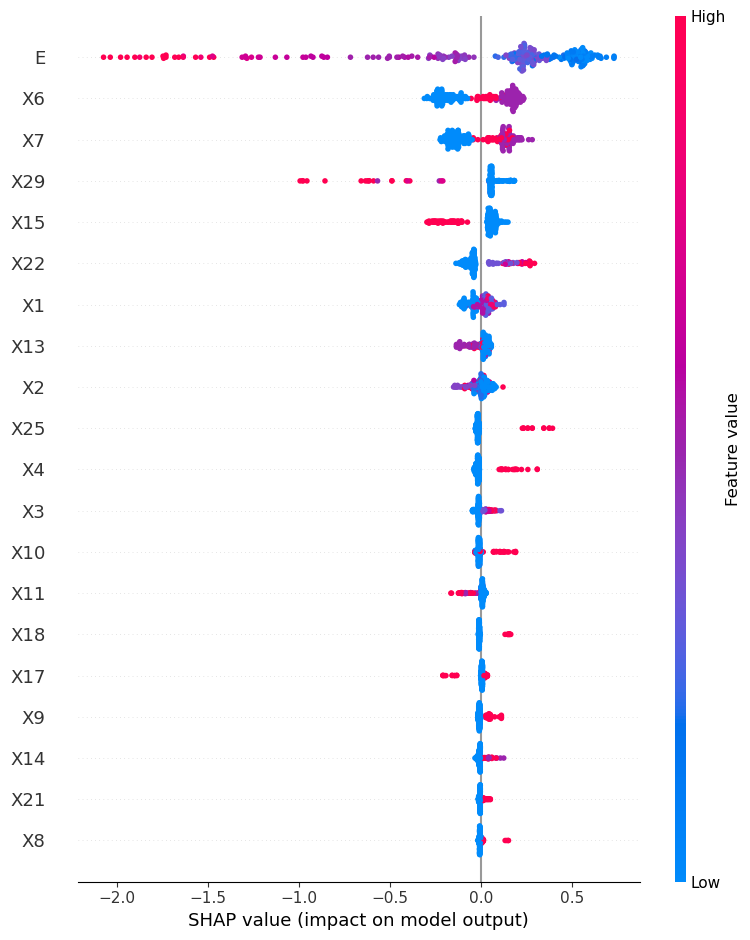

In [13]:
import shap
import matplotlib.pyplot as plt

# 合并 X_train 和 y_train
data = pd.concat([X_train, X_test])

# 创建SHAP解释器对象
explainer = shap.TreeExplainer(best_xgb_reg)

# 获取SHAP值
shap_values = explainer.shap_values(data)

# 可视化SHAP值
shap.summary_plot(shap_values, data)
plt.rcParams['figure.dpi']=600

# 显示可视化图
plt.show()


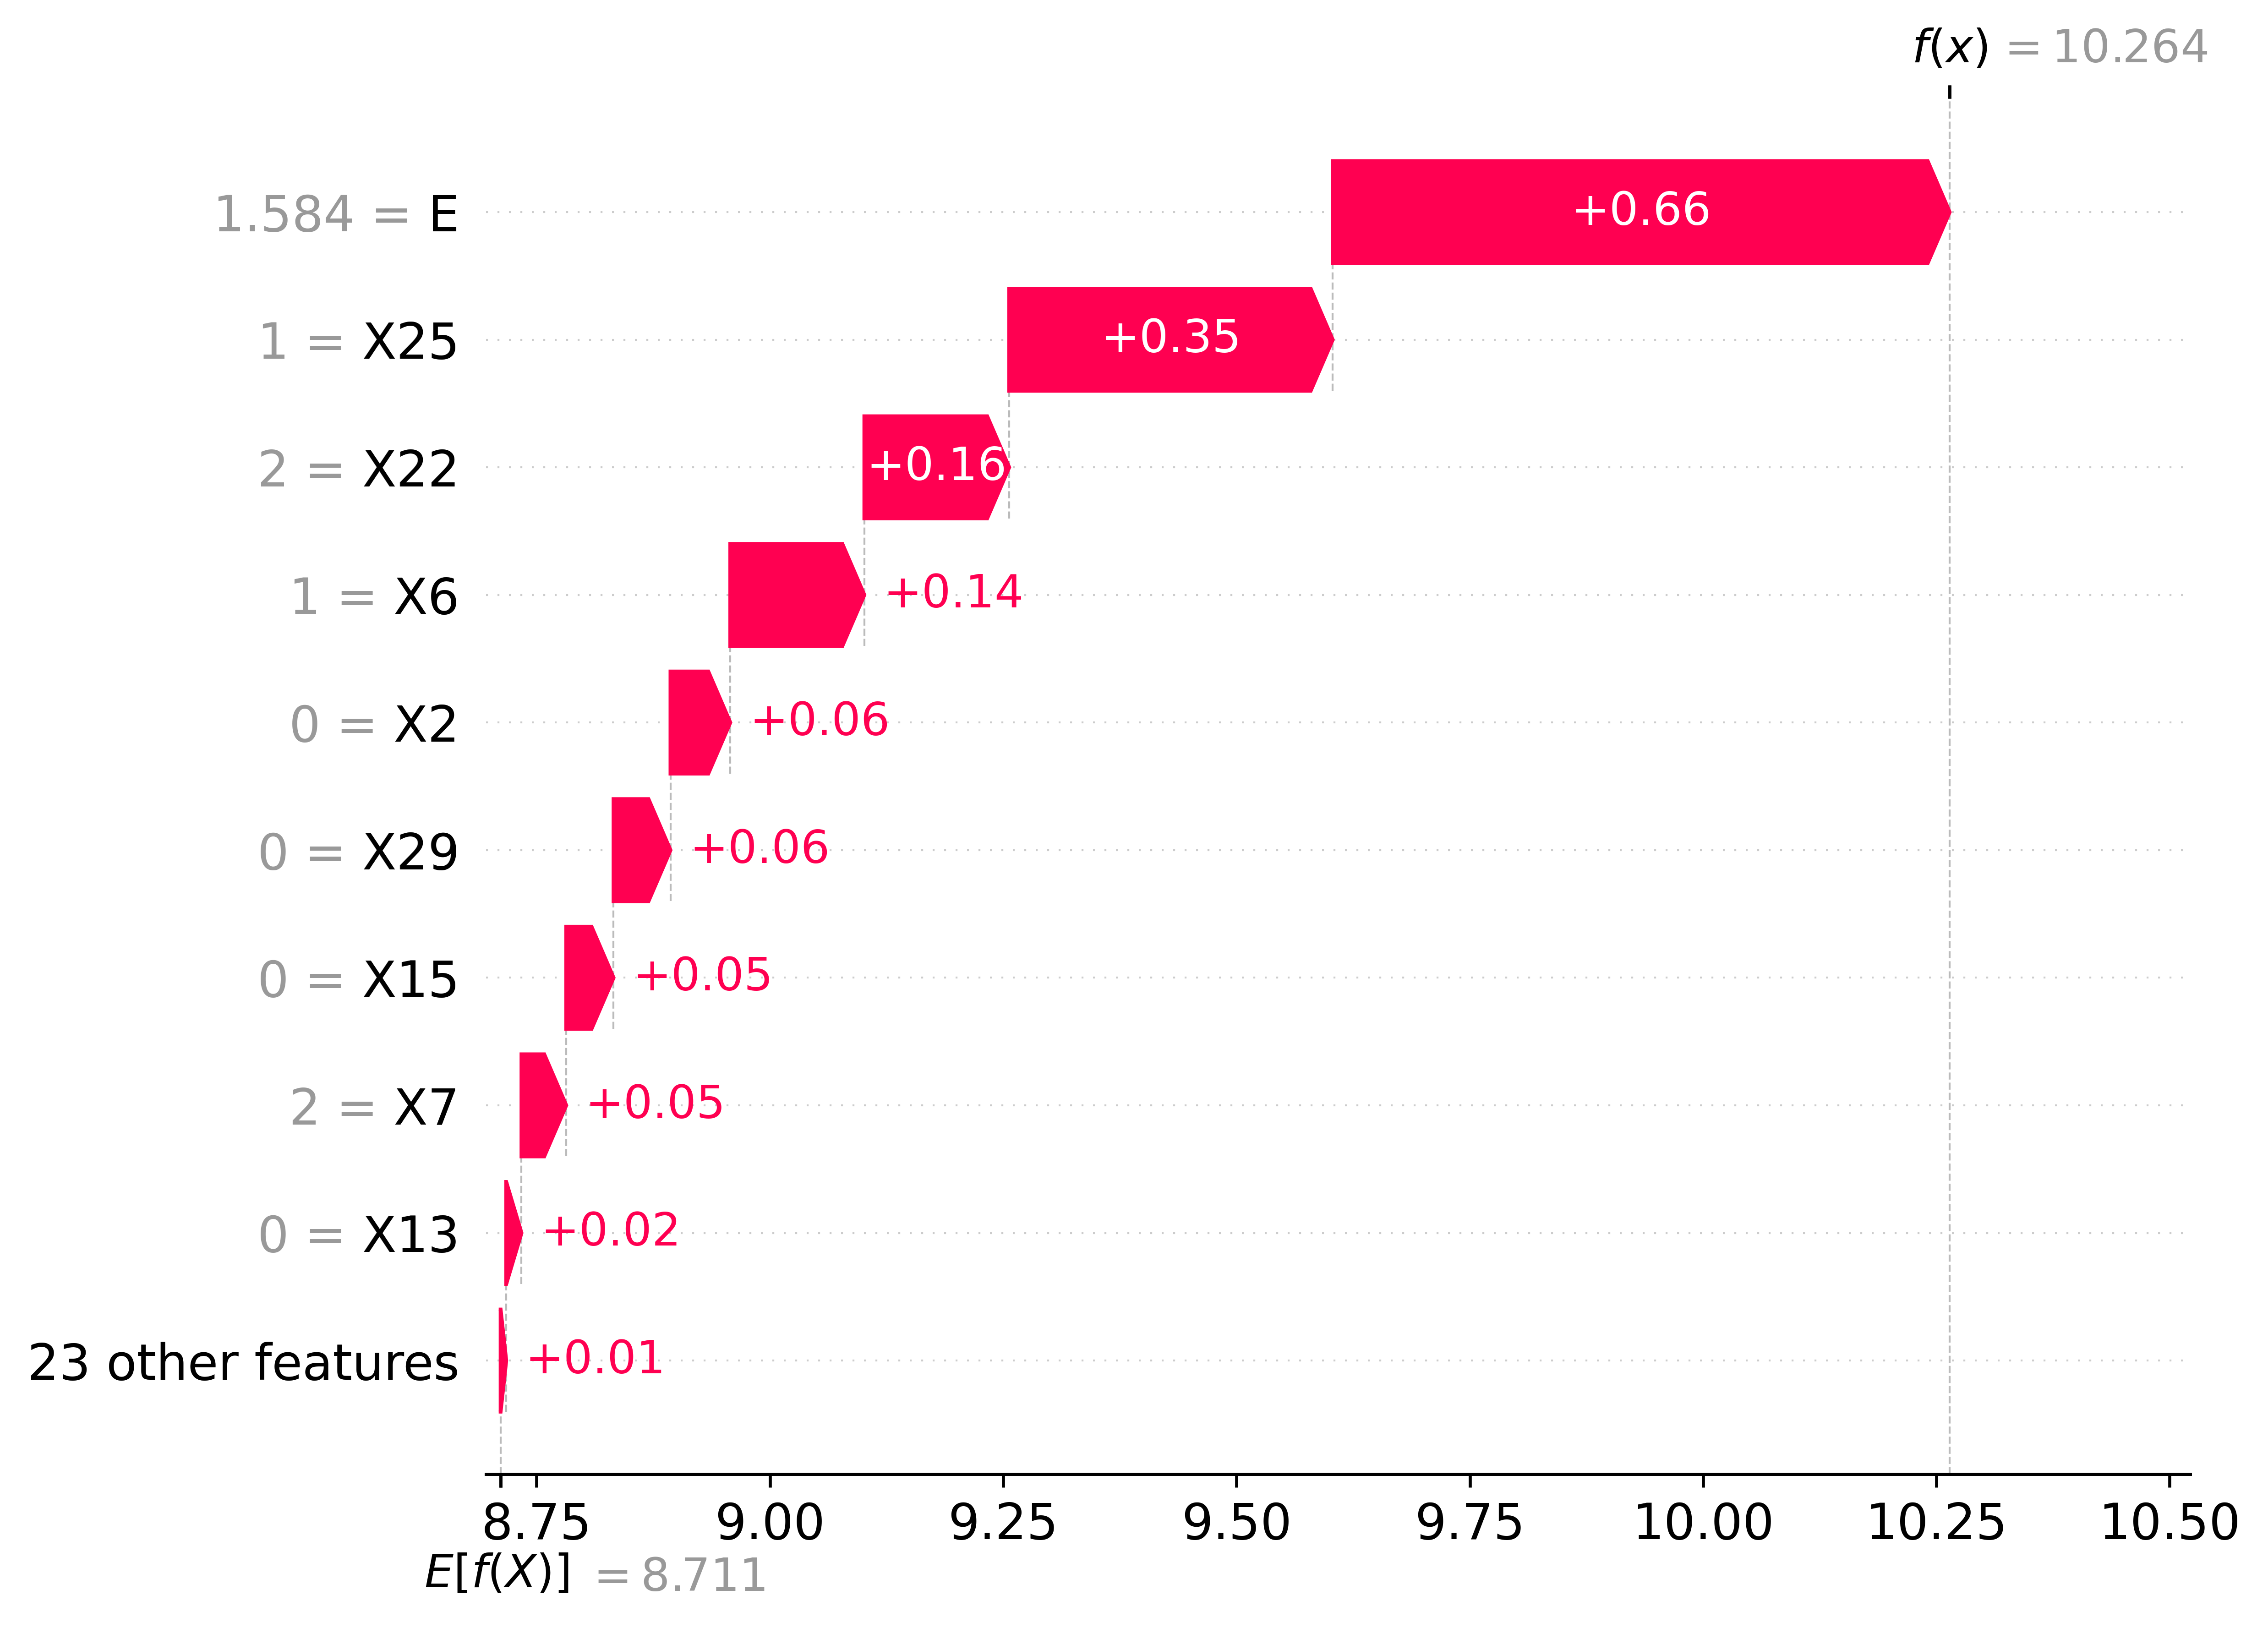

In [14]:
shap_values1 = explainer(data)

# 显示可视化图
shap.plots.waterfall(shap_values1[187])

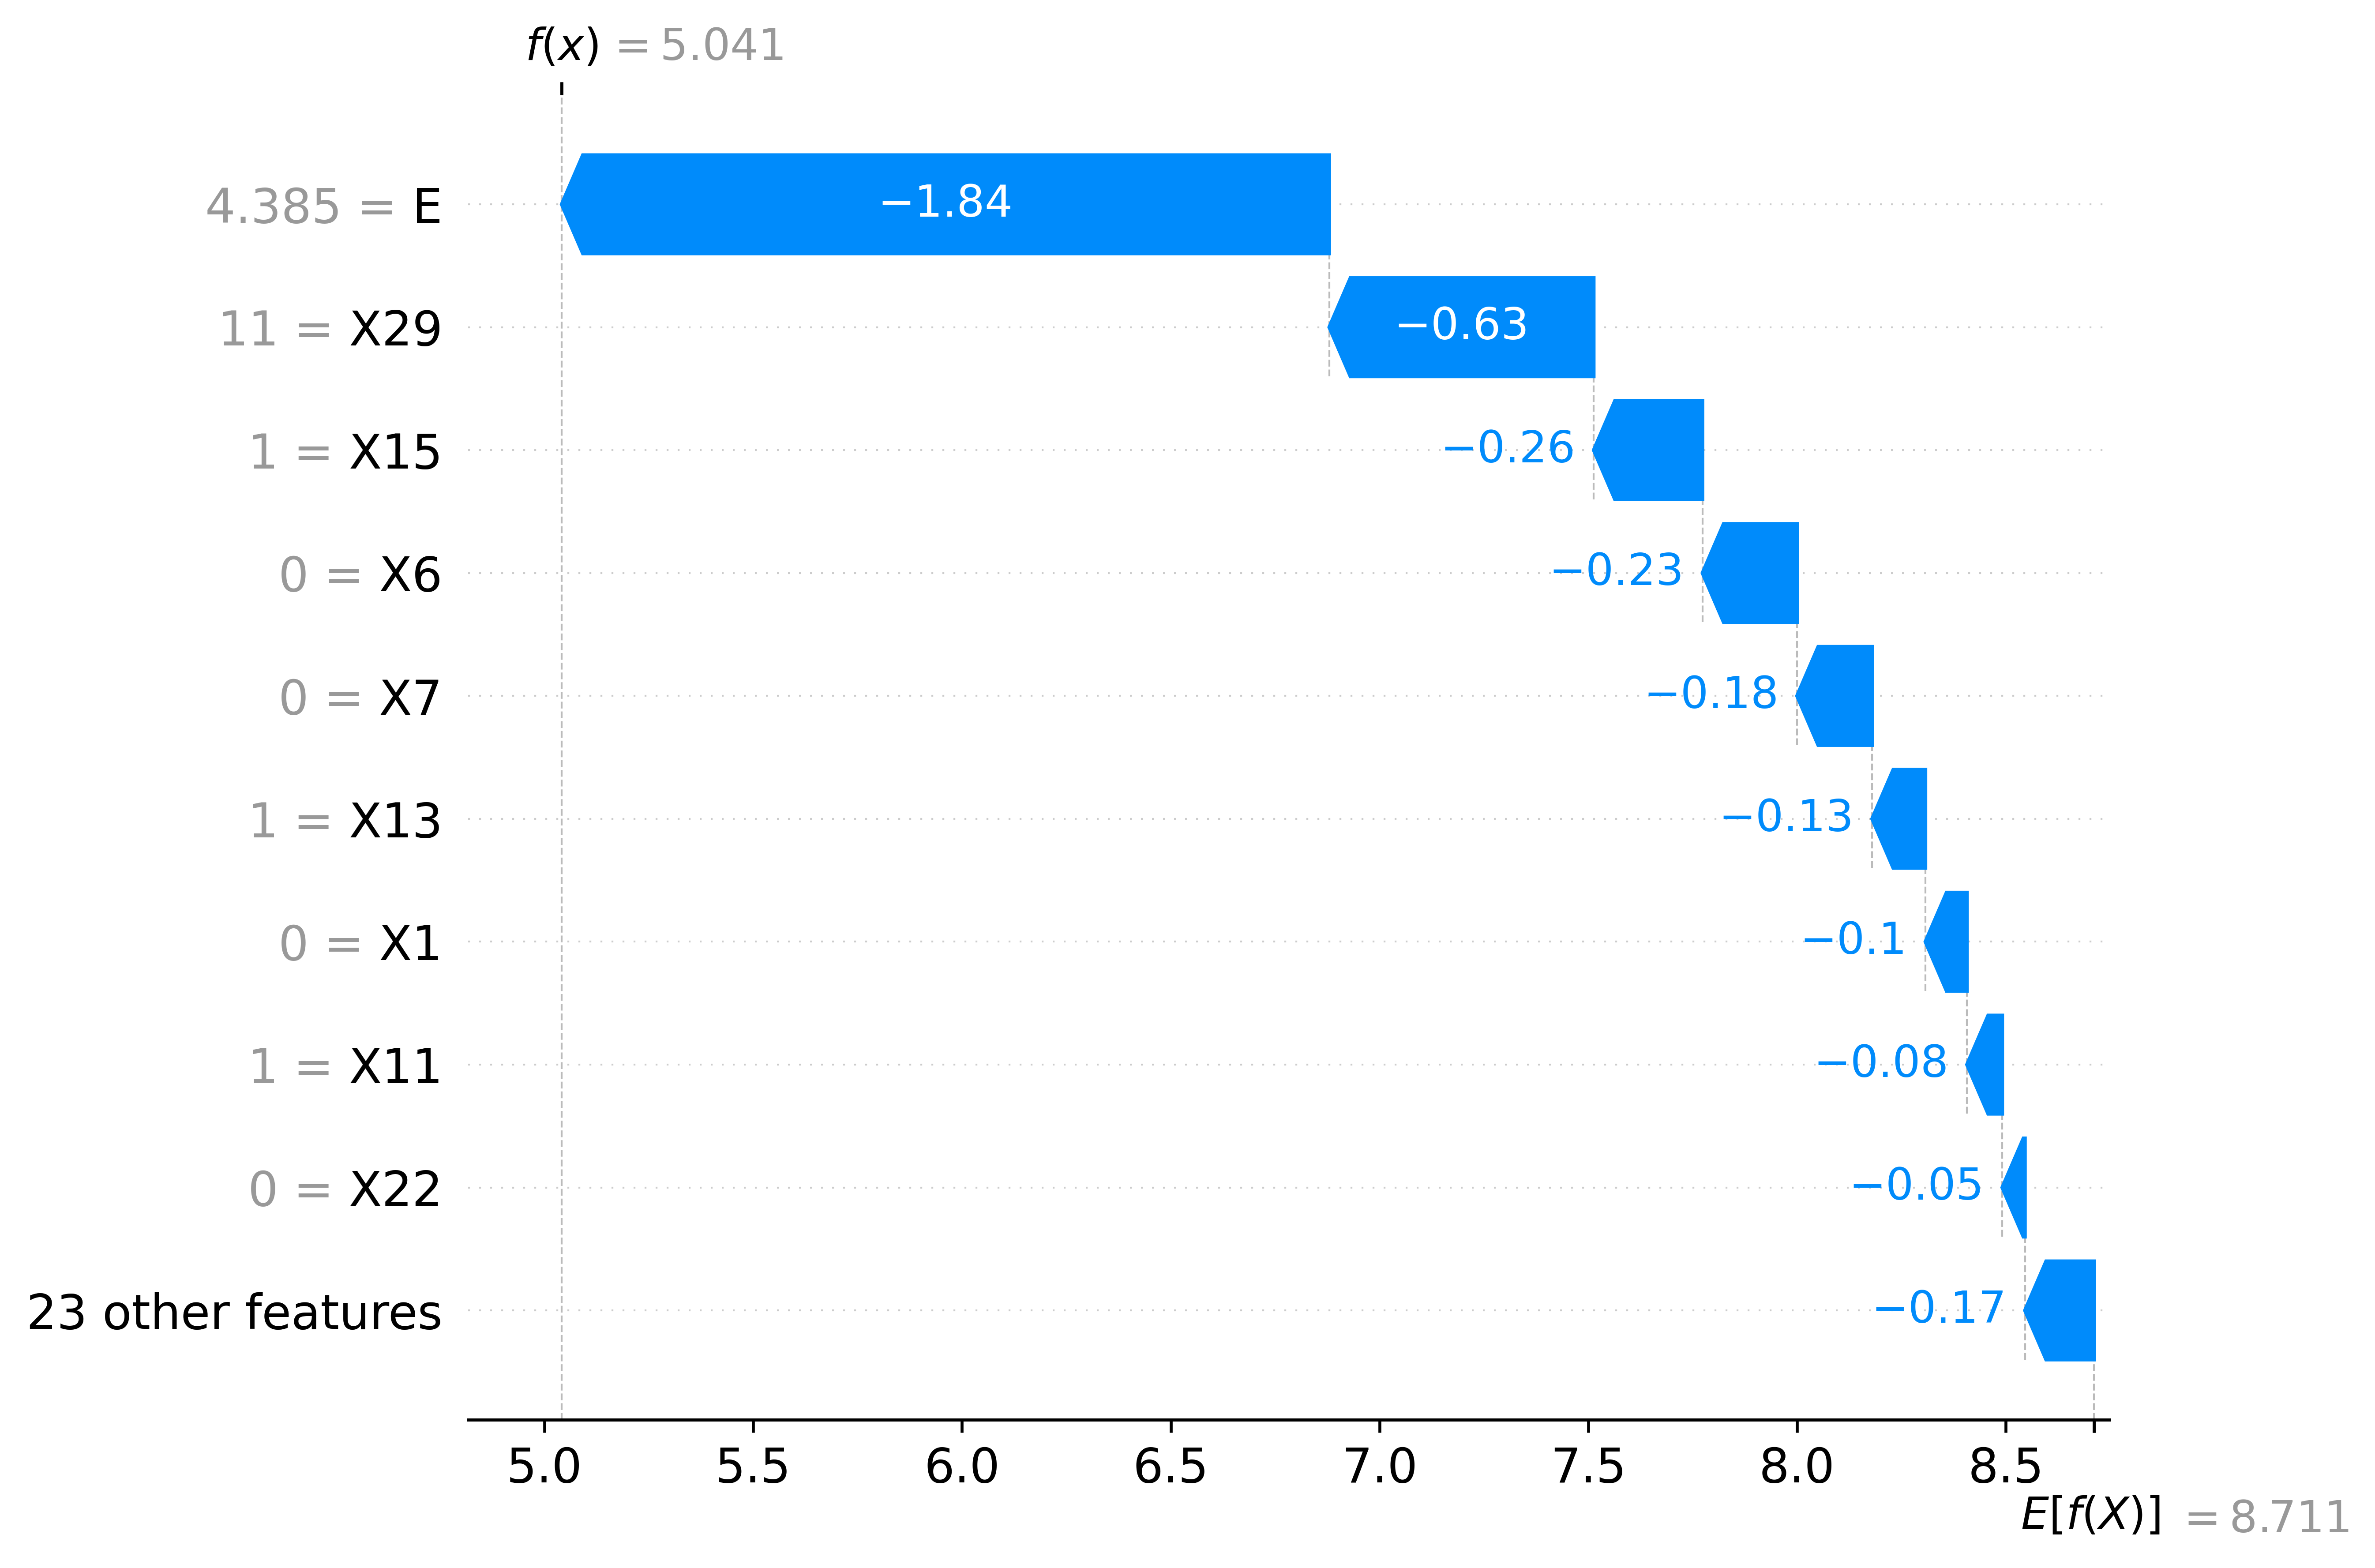

In [15]:
# 显示可视化图
shap.plots.waterfall(shap_values1[211])

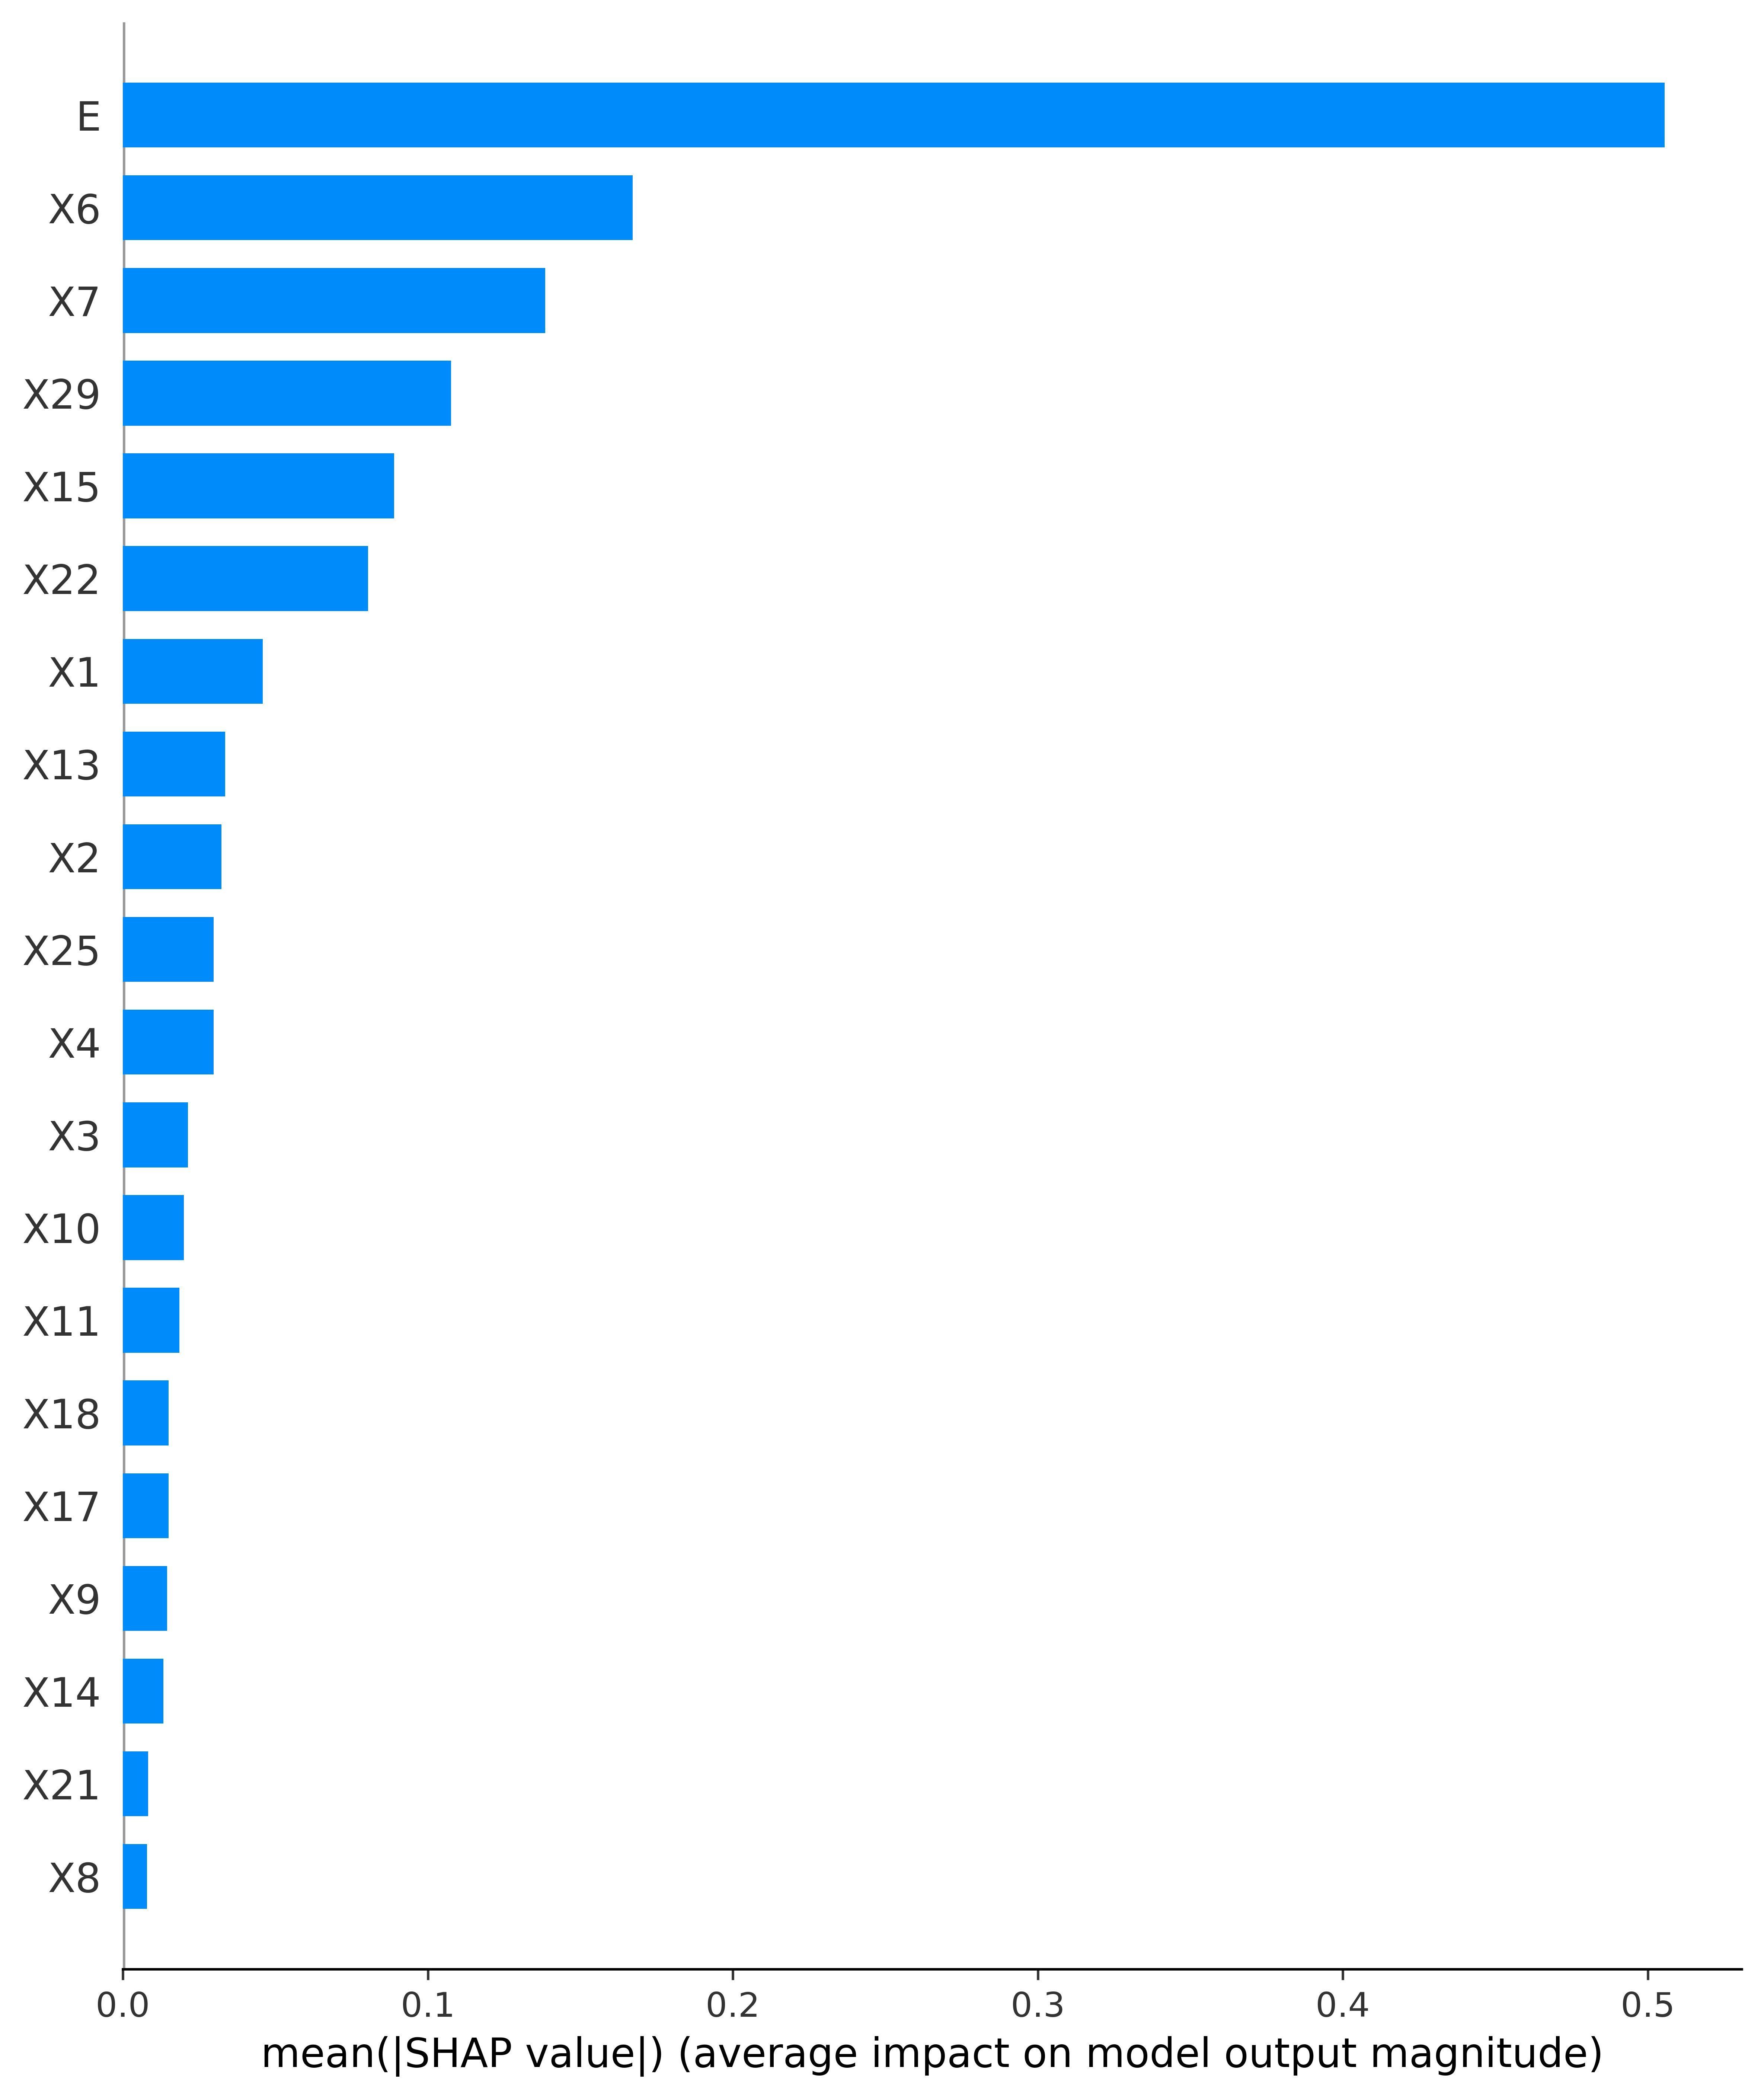

In [16]:
shap.summary_plot(shap_values,data, plot_type="bar")